In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)


# 한글 나눔포트 사용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Mounted at /content/drive
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,991 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading datab

In [2]:
import pandas as pd
import numpy as np
import tqdm
import matplotlib as plt

data = pd.read_csv('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/5_City_weather.csv', index_col = 0)
test = pd.read_csv('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/235830_가스공급량 수요예측 모델개발_data/test.csv')

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

In [4]:
data['구분'].unique()

array(['A', 'B', 'C', 'D', 'E', 'G', 'H'], dtype=object)

In [5]:
d_map = {}
for i, d in enumerate(data['구분'].unique()):
    d_map[d] = i
data['구분'] = data['구분'].map(d_map)

data['월일'] = data['연월일'].apply(lambda x : x[5:] )
data['연월일'] = pd.to_datetime(data['연월일'])
data['year'] = data['연월일'].dt.year
data['month'] = data['연월일'].dt.month
data['day'] = data['연월일'].dt.day
data['weekday'] = data['연월일'].dt.weekday
test['일자'] = test['일자|시간|구분'].str.split(' ').str[0]
test['시간'] = test['일자|시간|구분'].str.split(' ').str[1].astype(int)
test['구분'] = test['일자|시간|구분'].str.split(' ').str[2]

test['월일'] = test['일자'].apply(lambda x : x[5:] )
test['일자'] = pd.to_datetime(test['일자'])
test['year'] = test['일자'].dt.year
test['month'] = test['일자'].dt.month
test['day'] = test['일자'].dt.day
test['weekday'] = test['일자'].dt.weekday
test['구분'] = test['구분'].map(d_map)

In [6]:
data['구분'].unique()

array([0, 1, 2, 3, 4, 5, 6])

### data에서 이상치들 대체 방법

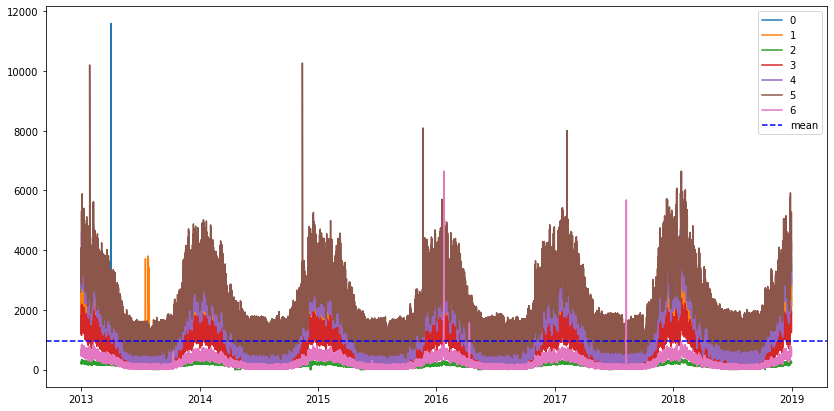

In [7]:
plt.figure(figsize=(14,7))
for i in data["구분"].unique():
    df = data[data["구분"]==i]
    plt.plot(df["연월일"], df["공급량"], label=str(i))

plt.axhline(y=data["공급량"].mean(), linestyle='--', color='blue', label="mean")
plt.legend()
plt.show()

In [8]:
data

,연월일,시간,구분,공급량,경기도,충청도,전라도,강원도,경상도,제주도,월일,year,month,day,weekday
0,2013-01-01,1,0,2497.129,-8.64,-10.118182,-4.222727,-10.021429,-5.716129,3.60,01-01,2013,1,1,1
1,2013-01-01,2,0,2363.265,-8.85,-9.945455,-4.686364,-10.342857,-6.400000,3.60,01-01,2013,1,1,1
2,2013-01-01,3,0,2258.505,-8.69,-10.054545,-4.800000,-10.564286,-6.845161,3.60,01-01,2013,1,1,1
3,2013-01-01,4,0,2243.969,-8.37,-9.990909,-4.613636,-10.950000,-7.200000,4.00,01-01,2013,1,1,1
4,2013-01-01,5,0,2344.105,-8.52,-9.945455,-4.340909,-11.514286,-7.770968,4.75,01-01,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,6,681.033,-3.91,-3.427273,-1.468182,-2.307143,0.532258,5.60,12-31,2018,12,31,0
368084,2018-12-31,21,6,669.961,-4.31,-3.963636,-1.854545,-3.257143,-0.038710,5.50,12-31,2018,12,31,0
368085,2018-12-31,22,6,657.941,-4.69,-4.800000,-2.386364,-3.792857,-0.316129,5.40,12-31,2018,12,31,0
368086,2018-12-31,23,6,610.953,-4.75,-5.227273,-2.586364,-4.364286,-0.745161,5.50,12-31,2018,12,31,0


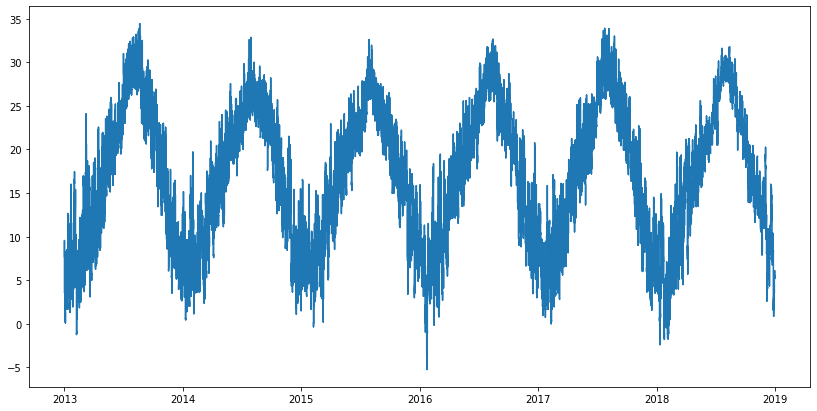

In [20]:
data_weather = data.loc[data['구분'] == 0][['공급량','연월일','제주도']]

# 구분당 그래프
plt.figure(figsize=(14,7))
plt.plot(data_weather["연월일"], data_weather['제주도'], label=str(i))
plt.show()


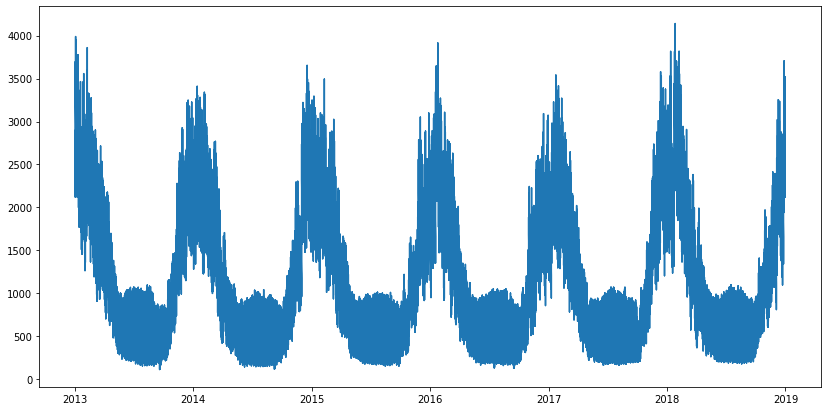

In [29]:
data_A = data.loc[data['구분'] == 0][['공급량','연월일']]

# 구분당 그래프
plt.figure(figsize=(14,7))
plt.plot(data_A["연월일"], data_A['공급량'], label=str(i))
plt.show()


In [27]:
data_A.loc[data_A['공급량'] > 10000]

data.iloc[2230,3] = data.iloc[2229,3]

In [28]:
data.iloc[2229:2231]

,연월일,시간,구분,공급량,경기도,충청도,전라도,강원도,경상도,제주도,월일,year,month,day,weekday
2229,2013-04-03,22,0,1673.345,7.21,8.354545,8.550000,11.078571,12.238710,12.10,04-03,2013,4,3,2
2230,2013-04-03,23,0,1673.345,6.45,7.263636,7.804545,10.228571,11.558065,11.55,04-03,2013,4,3,2


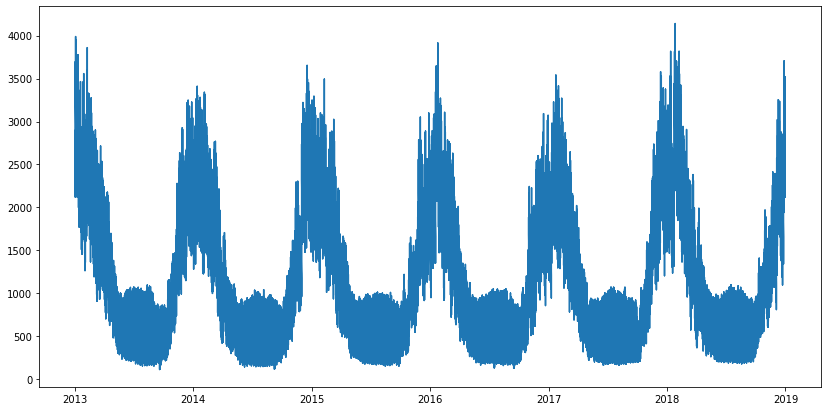

In [ ]:
data_A = data.loc[data['구분'] == 0][['공급량','연월일']]

# 구분당 그래프
plt.figure(figsize=(14,7))
plt.plot(data_A["연월일"], data_A['공급량'], label=str(i))
plt.show()


In [ ]:
data[2229:2231]

,연월일,시간,구분,공급량,경기도,충청도,전라도,강원도,경상도,제주도,월일,year,month,day,weekday
2229,2013-04-03,22,0,1673.345,7.21,8.354545,8.550000,11.078571,12.238710,12.10,04-03,2013,4,3,2
2230,2013-04-03,23,0,1673.345,6.45,7.263636,7.804545,10.228571,11.558065,11.55,04-03,2013,4,3,2


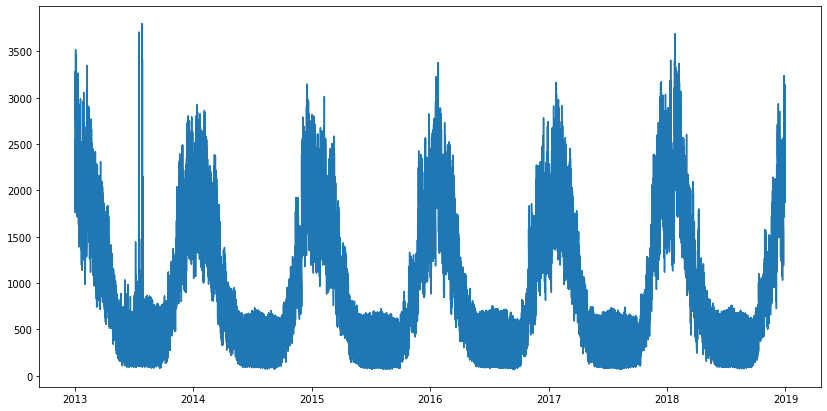

In [30]:
data_B = data.loc[data['구분'] == 1][['공급량','연월일']]

# 구분당 그래프
plt.figure(figsize=(14,7))
plt.plot(data_B["연월일"], data_B['공급량'], label=str(i))
plt.show()



In [31]:
B_outlier = [13531,13723,13747]

In [32]:
#Outlier 3개 제거
for i in B_outlier:
  data.iloc[i,3] = data.iloc[i-1,3]

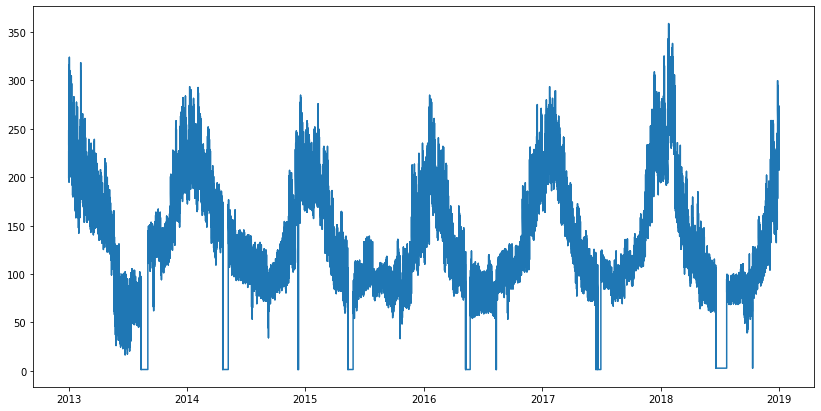

In [ ]:
#C는 이상치가 아래쪽으로 너무 많이 나있다고 판별
data_C = data.loc[data['구분'] == 2][['공급량','연월일']]

# 구분당 그래프
plt.figure(figsize=(14,7))
plt.plot(data_C["연월일"], data_C['공급량'], label=str(i))
plt.show()



In [ ]:
data_C.loc[data_C['공급량'] <= 2]

,공급량,연월일
22887,1.378,2013-08-12
22888,1.378,2013-08-12
22889,1.378,2013-08-12
22890,1.378,2013-08-12
22891,1.378,2013-08-12
...,...,...
267294,1.378,2017-06-30
267295,1.378,2017-06-30
267296,1.378,2017-06-30
267297,1.378,2017-06-30


In [ ]:
#1차로 공급량이 1.378인 것을 이상치로 판단.

In [ ]:
C_outlier_1 = data_C.loc[data_C['공급량'] <= 1.379].index
C_outlier_1

Int64Index([ 22887,  22888,  22889,  22890,  22891,  22892,  22893,  22894,
             22895,  22896,
            ...
            267289, 267290, 267291, 267292, 267293, 267294, 267295, 267296,
            267297, 267300],
           dtype='int64', length=1954)

In [ ]:
len(C_outlier_1)

1954

In [ ]:
for i in C_outlier_1:
  data.iloc[i,3] =  np.nan

In [ ]:
data

,연월일,시간,구분,공급량,경기도,충청도,전라도,강원도,경상도,제주도,월일,year,month,day,weekday
0,2013-01-01,1,0,2497.129,-8.64,-10.118182,-4.222727,-10.021429,-5.716129,3.60,01-01,2013,1,1,1
1,2013-01-01,2,0,2363.265,-8.85,-9.945455,-4.686364,-10.342857,-6.400000,3.60,01-01,2013,1,1,1
2,2013-01-01,3,0,2258.505,-8.69,-10.054545,-4.800000,-10.564286,-6.845161,3.60,01-01,2013,1,1,1
3,2013-01-01,4,0,2243.969,-8.37,-9.990909,-4.613636,-10.950000,-7.200000,4.00,01-01,2013,1,1,1
4,2013-01-01,5,0,2344.105,-8.52,-9.945455,-4.340909,-11.514286,-7.770968,4.75,01-01,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,6,681.033,-3.91,-3.427273,-1.468182,-2.307143,0.532258,5.60,12-31,2018,12,31,0
368084,2018-12-31,21,6,669.961,-4.31,-3.963636,-1.854545,-3.257143,-0.038710,5.50,12-31,2018,12,31,0
368085,2018-12-31,22,6,657.941,-4.69,-4.800000,-2.386364,-3.792857,-0.316129,5.40,12-31,2018,12,31,0
368086,2018-12-31,23,6,610.953,-4.75,-5.227273,-2.586364,-4.364286,-0.745161,5.50,12-31,2018,12,31,0


In [ ]:
for i in C_outlier_1:
  print(data.iloc[i])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
경상도                    14.0355
제주도                      19.95
월일                       05-22
year                      2016
month                        5
day                         22
weekday                      6
Name: 204939, dtype: object
연월일        2016-05-22 00:00:00
시간                           5
구분                           2
공급량                        NaN
경기도                       16.5
충청도                    14.2818
전라도                    16.2909
강원도                    12.6929
경상도                    14.1258
제주도                      19.65
월일                       05-22
year                      2016
month                        5
day                         22
weekday                      6
Name: 204940, dtype: object
연월일        2016-05-22 00:00:00
시간                           6
구분                           2
공급량                        NaN
경기도                      16.09
충청도                    13.6091
전라도                       16.7
강원도      

In [ ]:
data.interpolate(method = 'linear', limit_direction = 'forward', inplace = True)

In [ ]:
data_C.loc[data_C['공급량'] <= 3]

,공급량,연월일
81494,2.978000,2014-04-21
143693,2.998779,2015-05-28
143694,2.996701,2015-05-28
143695,2.994623,2015-05-28
143696,2.992545,2015-05-28
...,...,...
331090,2.756000,2018-10-11
331091,2.756000,2018-10-11
331092,2.756000,2018-10-11
331093,2.756000,2018-10-11


In [ ]:
C_outlier_2 = data_C.loc[data_C['공급량'] <= 3].index
C_outlier_2

Int64Index([ 81494, 143693, 143694, 143695, 143696, 143697, 143698, 143699,
            143700, 143701,
            ...
            329166, 329167, 329168, 329169, 329170, 331090, 331091, 331092,
            331093, 331094],
           dtype='int64', length=811)

In [ ]:
for i in C_outlier_2:
  data.iloc[i,3] =  np.nan

In [ ]:
for i in C_outlier_2:
  print(data.iloc[i])

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
경상도                    28.2613
제주도                      29.05
월일                       07-10
year                      2018
month                        7
day                         10
weekday                      1
Name: 328863, dtype: object
연월일        2018-07-10 00:00:00
시간                          17
구분                           2
공급량                    24.3063
경기도                      25.36
충청도                    27.7182
전라도                    27.2955
강원도                    23.2571
경상도                    28.3871
제주도                       29.2
월일                       07-10
year                      2018
month                        7
day                         10
weekday                      1
Name: 328864, dtype: object
연월일        2018-07-10 00:00:00
시간                          18
구분                           2
공급량                    24.2543
경기도                      25.19
충청도                    27.8636
전라도                    27.2636
강원도      

In [ ]:
data.interpolate(method = 'linear', limit_direction = 'forward', inplace = True)

In [ ]:
#이것저것이 무엇이 있나용?
#이상치라고 판단하고 지우기도 해보고, 다른 값으로 대체를 해보기도 하고 오케이


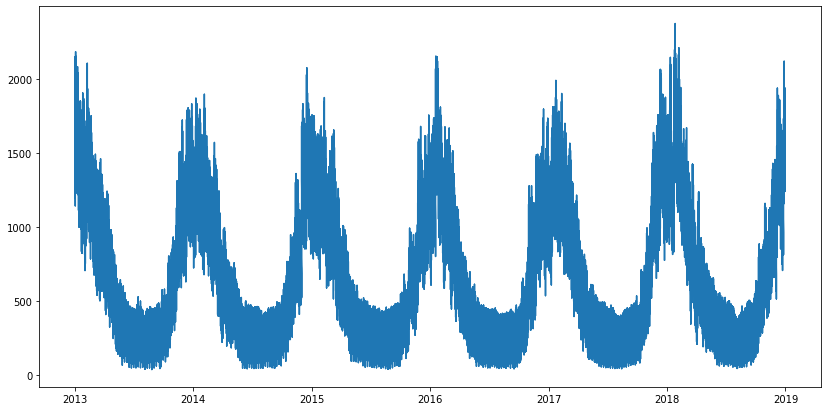

In [33]:
#D는 이상치 없다고 판별
data_D = data.loc[data['구분'] == 3][['공급량','연월일']]

# 구분당 그래프
plt.figure(figsize=(14,7))
plt.plot(data_D["연월일"], data_D['공급량'], label=str(i))
plt.show()



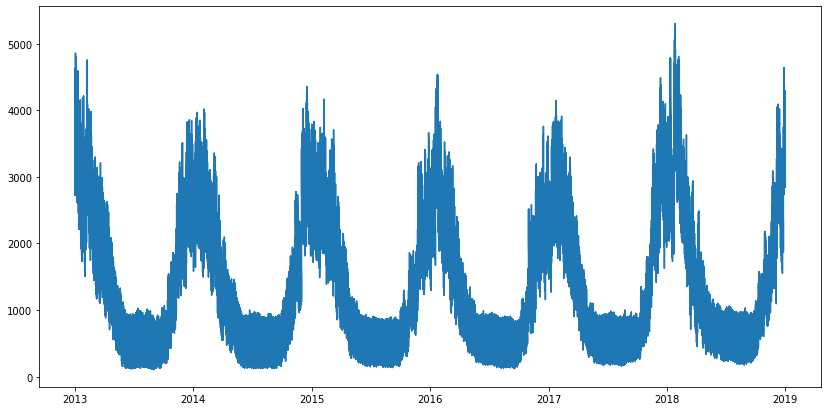

In [34]:
#E

data_E = data.loc[data['구분'] == 4][['공급량','연월일']]

# 구분당 그래프그래프
plt.figure(figsize=(14,7))
plt.plot(data_E["연월일"], data_E['공급량'], label=str(i))
plt.show()



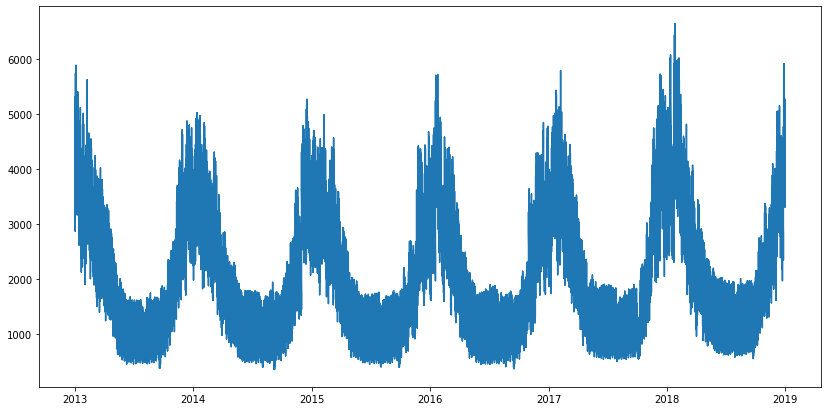

In [38]:
#E

data_G = data.loc[data['구분'] == 5][['공급량','연월일']]

# 구분당 그래프그래프
plt.figure(figsize=(14,7))
plt.plot(data_G["연월일"], data_G['공급량'], label=str(i))
plt.show()



In [36]:
#Outlier 4개 확인
G_outlier = data_G.loc[data_G['공급량'] > 7000].index
G_outlier

Int64Index([44447, 112751, 174229, 290137], dtype='int64')

In [37]:
#Outlier 4개 제거
for i in G_outlier:
  data.iloc[i] = data.iloc[i-1]

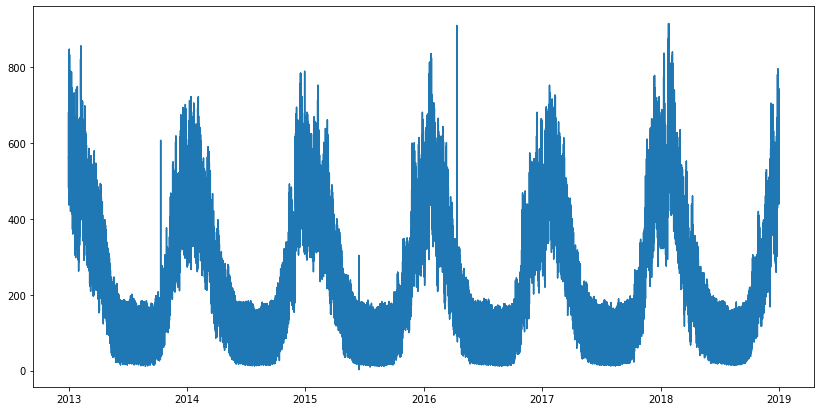

In [43]:
#F

data_H = data.loc[data['구분'] == 6][['공급량','연월일']]

# 구분당 그래프그래프
plt.figure(figsize=(14,7))
plt.plot(data_H["연월일"], data_H['공급량'], label=str(i))
plt.show()



In [40]:
#outlier [237216, 237217, 239116, 303299, 303300]
H_outlier = data_H.loc[data_H['공급량'] > 1500].index

In [41]:
H_outlier

Int64Index([237216, 237217, 239116, 303299, 303300], dtype='int64')

In [42]:
#Outlier 4개 제거
for i in H_outlier:
  data.iloc[i] = data.iloc[i-1]

# 이상치 제거한 데이터 추출출

In [ ]:
data.

In [45]:
data.to_csv('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/Outlier.csv')

In [52]:
data = pd.read_csv('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/Outlier.csv', index_col = 0)


In [53]:
data

,연월일,시간,구분,공급량,경기도,충청도,전라도,강원도,경상도,제주도,월일,year,month,day,weekday
0,2013-01-01,1,0,2497.129,-8.64,-10.118182,-4.222727,-10.021429,-5.716129,3.60,01-01,2013,1,1,1
1,2013-01-01,2,0,2363.265,-8.85,-9.945455,-4.686364,-10.342857,-6.400000,3.60,01-01,2013,1,1,1
2,2013-01-01,3,0,2258.505,-8.69,-10.054545,-4.800000,-10.564286,-6.845161,3.60,01-01,2013,1,1,1
3,2013-01-01,4,0,2243.969,-8.37,-9.990909,-4.613636,-10.950000,-7.200000,4.00,01-01,2013,1,1,1
4,2013-01-01,5,0,2344.105,-8.52,-9.945455,-4.340909,-11.514286,-7.770968,4.75,01-01,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,6,681.033,-3.91,-3.427273,-1.468182,-2.307143,0.532258,5.60,12-31,2018,12,31,0
368084,2018-12-31,21,6,669.961,-4.31,-3.963636,-1.854545,-3.257143,-0.038710,5.50,12-31,2018,12,31,0
368085,2018-12-31,22,6,657.941,-4.69,-4.800000,-2.386364,-3.792857,-0.316129,5.40,12-31,2018,12,31,0
368086,2018-12-31,23,6,610.953,-4.75,-5.227273,-2.586364,-4.364286,-0.745161,5.50,12-31,2018,12,31,0


### 테스트에 날씨 데이터 합치는 과정

In [54]:
area = ['경기도', '충청도', '전라도','강원도','경상도','제주도']

In [55]:
data

,연월일,시간,구분,공급량,경기도,충청도,전라도,강원도,경상도,제주도,월일,year,month,day,weekday
0,2013-01-01,1,0,2497.129,-8.64,-10.118182,-4.222727,-10.021429,-5.716129,3.60,01-01,2013,1,1,1
1,2013-01-01,2,0,2363.265,-8.85,-9.945455,-4.686364,-10.342857,-6.400000,3.60,01-01,2013,1,1,1
2,2013-01-01,3,0,2258.505,-8.69,-10.054545,-4.800000,-10.564286,-6.845161,3.60,01-01,2013,1,1,1
3,2013-01-01,4,0,2243.969,-8.37,-9.990909,-4.613636,-10.950000,-7.200000,4.00,01-01,2013,1,1,1
4,2013-01-01,5,0,2344.105,-8.52,-9.945455,-4.340909,-11.514286,-7.770968,4.75,01-01,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,6,681.033,-3.91,-3.427273,-1.468182,-2.307143,0.532258,5.60,12-31,2018,12,31,0
368084,2018-12-31,21,6,669.961,-4.31,-3.963636,-1.854545,-3.257143,-0.038710,5.50,12-31,2018,12,31,0
368085,2018-12-31,22,6,657.941,-4.69,-4.800000,-2.386364,-3.792857,-0.316129,5.40,12-31,2018,12,31,0
368086,2018-12-31,23,6,610.953,-4.75,-5.227273,-2.586364,-4.364286,-0.745161,5.50,12-31,2018,12,31,0


In [56]:
#년도별 기온 데이터
data_2013 = data.loc[data['year'] == 2013][area].reset_index(drop=True)
data_2014 = data.loc[data['year'] == 2014][area].reset_index(drop=True)
data_2015 = data.loc[data['year'] == 2015][area].reset_index(drop=True)
data_2016 = data.loc[data['year'] == 2016][area].reset_index(drop=True)
data_2017 = data.loc[data['year'] == 2017][area].reset_index(drop=True)


In [57]:
#윤년 없는 년도들의 평균 기온
avg_temp = (data_2013 + data_2014 + data_2015 + data_2017)/4

In [58]:
#합쳐주기 위해 월일 데이터 뽑기
date = data.loc[data['year'] == 2013]['월일'].reset_index(drop=True)

In [59]:
avg_temp = pd.concat([avg_temp, date], axis = 1)

In [60]:
avg_temp

,경기도,충청도,전라도,강원도,경상도,제주도,월일
0,-2.46625,-2.668182,0.014205,-2.806250,-0.501613,6.16875,01-01
1,-2.88000,-2.947727,-0.350000,-3.357143,-0.888710,6.28750,01-01
2,-3.33000,-3.311364,-0.588636,-3.764286,-1.208065,6.00000,01-01
3,-3.57000,-3.679545,-0.826136,-4.223214,-1.664516,6.30000,01-01
4,-3.96750,-4.238636,-1.152273,-4.732143,-2.133871,6.22500,01-01
...,...,...,...,...,...,...,...
61315,0.50500,1.009091,2.336364,0.882143,2.714516,8.05000,12-31
61316,0.12500,0.456818,1.969318,0.542857,2.165323,8.12500,12-31
61317,-0.25500,-0.095455,1.671591,0.189286,1.740323,7.80000,12-31
61318,-0.52750,-0.527273,1.294318,-0.226786,1.493548,7.55000,12-31


In [61]:
test

,일자|시간|구분,일자,시간,구분,월일,year,month,day,weekday
0,2019-01-01 01 A,2019-01-01,1,0,01-01,2019,1,1,1
1,2019-01-01 02 A,2019-01-01,2,0,01-01,2019,1,1,1
2,2019-01-01 03 A,2019-01-01,3,0,01-01,2019,1,1,1
3,2019-01-01 04 A,2019-01-01,4,0,01-01,2019,1,1,1
4,2019-01-01 05 A,2019-01-01,5,0,01-01,2019,1,1,1
...,...,...,...,...,...,...,...,...,...
15115,2019-03-31 20 H,2019-03-31,20,6,03-31,2019,3,31,6
15116,2019-03-31 21 H,2019-03-31,21,6,03-31,2019,3,31,6
15117,2019-03-31 22 H,2019-03-31,22,6,03-31,2019,3,31,6
15118,2019-03-31 23 H,2019-03-31,23,6,03-31,2019,3,31,6


In [62]:
test_temp = pd.merge(test,avg_temp, how = 'left', on = '월일')
test_temp_1 = test_temp.drop('일자|시간|구분', axis = 1)   # 필요없는 column 삭제

In [63]:
test_temp_1

,일자,시간,구분,월일,year,month,day,weekday,경기도,충청도,전라도,강원도,경상도,제주도
0,2019-01-01,1,0,01-01,2019,1,1,1,-2.46625,-2.668182,0.014205,-2.806250,-0.501613,6.16875
1,2019-01-01,1,0,01-01,2019,1,1,1,-2.88000,-2.947727,-0.350000,-3.357143,-0.888710,6.28750
2,2019-01-01,1,0,01-01,2019,1,1,1,-3.33000,-3.311364,-0.588636,-3.764286,-1.208065,6.00000
3,2019-01-01,1,0,01-01,2019,1,1,1,-3.57000,-3.679545,-0.826136,-4.223214,-1.664516,6.30000
4,2019-01-01,1,0,01-01,2019,1,1,1,-3.96750,-4.238636,-1.152273,-4.732143,-2.133871,6.22500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540155,2019-03-31,24,6,03-31,2019,3,31,6,10.76000,11.202273,11.435227,9.605357,11.710484,14.12500
2540156,2019-03-31,24,6,03-31,2019,3,31,6,9.89000,9.797727,10.561364,8.632143,10.849194,13.66250
2540157,2019-03-31,24,6,03-31,2019,3,31,6,9.34750,8.970455,9.845455,8.007143,10.153226,13.13750
2540158,2019-03-31,24,6,03-31,2019,3,31,6,9.04500,8.236364,9.254545,7.523214,9.517742,12.83750


In [74]:
data_ = data.drop(['연월일','월일'], axis =1)
data_

,시간,구분,공급량,경기도,충청도,전라도,강원도,경상도,제주도,year,month,day,weekday
0,1,0,2497.129,-8.64,-10.118182,-4.222727,-10.021429,-5.716129,3.60,2013,1,1,1
1,2,0,2363.265,-8.85,-9.945455,-4.686364,-10.342857,-6.400000,3.60,2013,1,1,1
2,3,0,2258.505,-8.69,-10.054545,-4.800000,-10.564286,-6.845161,3.60,2013,1,1,1
3,4,0,2243.969,-8.37,-9.990909,-4.613636,-10.950000,-7.200000,4.00,2013,1,1,1
4,5,0,2344.105,-8.52,-9.945455,-4.340909,-11.514286,-7.770968,4.75,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,20,6,681.033,-3.91,-3.427273,-1.468182,-2.307143,0.532258,5.60,2018,12,31,0
368084,21,6,669.961,-4.31,-3.963636,-1.854545,-3.257143,-0.038710,5.50,2018,12,31,0
368085,22,6,657.941,-4.69,-4.800000,-2.386364,-3.792857,-0.316129,5.40,2018,12,31,0
368086,23,6,610.953,-4.75,-5.227273,-2.586364,-4.364286,-0.745161,5.50,2018,12,31,0


In [75]:
data_A = data_.loc[data_['구분']==0]
data_B = data_.loc[data_['구분']==1]
data_C = data_.loc[data_['구분']==2]
data_D = data_.loc[data_['구분']==3]
data_E = data_.loc[data_['구분']==4]
data_G = data_.loc[data_['구분']==5]
data_H = data_.loc[data_['구분']==6]


In [76]:
data_A

,시간,구분,공급량,경기도,충청도,전라도,강원도,경상도,제주도,year,month,day,weekday
0,1,0,2497.129,-8.64,-10.118182,-4.222727,-10.021429,-5.716129,3.60,2013,1,1,1
1,2,0,2363.265,-8.85,-9.945455,-4.686364,-10.342857,-6.400000,3.60,2013,1,1,1
2,3,0,2258.505,-8.69,-10.054545,-4.800000,-10.564286,-6.845161,3.60,2013,1,1,1
3,4,0,2243.969,-8.37,-9.990909,-4.613636,-10.950000,-7.200000,4.00,2013,1,1,1
4,5,0,2344.105,-8.52,-9.945455,-4.340909,-11.514286,-7.770968,4.75,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315523,20,0,3040.868,-3.91,-3.427273,-1.468182,-2.307143,0.532258,5.60,2018,12,31,0
315524,21,0,2973.577,-4.31,-3.963636,-1.854545,-3.257143,-0.038710,5.50,2018,12,31,0
315525,22,0,2840.272,-4.69,-4.800000,-2.386364,-3.792857,-0.316129,5.40,2018,12,31,0
315526,23,0,2692.385,-4.75,-5.227273,-2.586364,-4.364286,-0.745161,5.50,2018,12,31,0


# A에 대한 Dataset & Training

In [77]:
train_years = [2013,2014,2015,2016,2017]
val_years = [2018]

In [78]:
train_A = data_A[data_A['year'].isin(train_years)]
val_A = data_A[data_A['year'].isin(val_years)]
# print(df_train.shape)
# print(df_val_A.shape)
X_train_A = train_A.drop(['공급량'], axis = 1)
y_train_A = train_A['공급량']
X_val_A = val_A.drop(['공급량'], axis = 1)
y_val_A = val_A['공급량']

In [79]:

X_train = X_train_A.values
X_test = X_val_A.values
y_train = y_train_A.values
y_test = y_val_A.values

In [80]:
X_train_A.shape

(43824, 12)

In [81]:

X_train_t = X_train.reshape(X_train.shape[0],12,1)
X_test_t = X_test.reshape(X_test.shape[0],12,1)

print(X_train_t.shape)
print(X_train_t)
print(y_train)

(43824, 12, 1)
[[[ 1.  ]
  [ 0.  ]
  [-8.64]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 [[ 2.  ]
  [ 0.  ]
  [-8.85]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 [[ 3.  ]
  [ 0.  ]
  [-8.69]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 ...

 [[22.  ]
  [ 0.  ]
  [-0.46]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]

 [[23.  ]
  [ 0.  ]
  [-0.66]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]

 [[24.  ]
  [ 0.  ]
  [-0.87]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]]
[2497.129 2363.265 2258.505 ... 2054.192 1981.397 1897.268]


In [83]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K
from keras.callbacks import EarlyStopping

K.clear_session()
  
model_A = Sequential() # Sequeatial Model 
model_A.add(LSTM(20,activation = 'relu', input_shape=(12, 1))) # (timestep, feature) 
model_A.add(Dense(10)) # output = 1 
model_A.add(Dense(1))
model_A.compile(loss='mae', optimizer='adam') 
model_A.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,981
Trainable params: 1,981
Non-trainable params: 0
_________________________________________________________________


In [84]:
early_stop = EarlyStopping(monitor='loss', patience=10, mode = 'auto')

model_A.fit(X_train_t, y_train, epochs=1000, batch_size=32, verbose=2, callbacks = [early_stop])

Epoch 1/1000
1370/1370 - 9s - loss: 274.7407 - 9s/epoch - 6ms/step
Epoch 2/1000
1370/1370 - 7s - loss: 225.0206 - 7s/epoch - 5ms/step
Epoch 3/1000
1370/1370 - 7s - loss: 188.4029 - 7s/epoch - 5ms/step
Epoch 4/1000
1370/1370 - 6s - loss: 169.8252 - 6s/epoch - 5ms/step
Epoch 5/1000
1370/1370 - 6s - loss: 173.0294 - 6s/epoch - 5ms/step
Epoch 6/1000
1370/1370 - 7s - loss: 159.7279 - 7s/epoch - 5ms/step
Epoch 7/1000
1370/1370 - 7s - loss: 156.2986 - 7s/epoch - 5ms/step
Epoch 8/1000
1370/1370 - 6s - loss: 153.2115 - 6s/epoch - 5ms/step
Epoch 9/1000
1370/1370 - 7s - loss: 147.2157 - 7s/epoch - 5ms/step
Epoch 10/1000
1370/1370 - 7s - loss: 152.0143 - 7s/epoch - 5ms/step
Epoch 11/1000
1370/1370 - 7s - loss: 144.1024 - 7s/epoch - 5ms/step
Epoch 12/1000
1370/1370 - 7s - loss: 140.5323 - 7s/epoch - 5ms/step
Epoch 13/1000
1370/1370 - 6s - loss: 140.4151 - 6s/epoch - 5ms/step
Epoch 14/1000
1370/1370 - 7s - loss: 137.0066 - 7s/epoch - 5ms/step
Epoch 15/1000
1370/1370 - 7s - loss: 135.1107 - 7s/epoch 

In [87]:
score = model_A.evaluate(X_test_t, y_test, batch_size = 32)
print(score)

274/274 [==============================] - 1s 2ms/step - loss: 104.5877
104.58773040771484


In [94]:
from keras.models import load_model

model_A.save('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/예측값들/LSTM_A.h5')  # creates a HDF5 file 'my_model.h5'
# del model_A  # deletes the existing model

# returns a compiled model
# identical to the previous one
model_A = load_model('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/예측값들/LSTM_A.h5')

#B에 대한 모델

In [88]:
train_B = data_B[data_B['year'].isin(train_years)]
val_B = data_B[data_B['year'].isin(val_years)]
# print(df_train.shape)
# print(df_val_B.shape)
X_train_B = train_B.drop(['공급량'], axis = 1)
y_train_B = train_B['공급량']
X_val_B = val_B.drop(['공급량'], axis = 1)
y_val_B = val_B['공급량']


X_train = X_train_B.values
X_test = X_val_B.values
y_train = y_train_B.values
y_test = y_val_B.values
X_train_t = X_train.reshape(X_train.shape[0],12,1)
X_test_t = X_test.reshape(X_test.shape[0],12,1)

print(X_train_t.shape)
print(X_train_t)
print(y_train)

(43824, 12, 1)
[[[ 1.  ]
  [ 1.  ]
  [-8.64]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 [[ 2.  ]
  [ 1.  ]
  [-8.85]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 [[ 3.  ]
  [ 1.  ]
  [-8.69]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 ...

 [[22.  ]
  [ 1.  ]
  [-0.46]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]

 [[23.  ]
  [ 1.  ]
  [-0.66]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]

 [[24.  ]
  [ 1.  ]
  [-0.87]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]]
[2169.093 2051.733 1923.253 ... 1958.145 1874.708 1788.664]


In [89]:
K.clear_session()
  
model_B = Sequential() # Sequeatial Model 
model_B.add(LSTM(20,activation = 'relu', input_shape=(12, 1))) # (timestep, feature) 
model_B.add(Dense(10)) # output = 1 
model_B.add(Dense(1))
model_B.compile(loss='mae', optimizer='adam') 
model_B.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,981
Trainable params: 1,981
Non-trainable params: 0
_________________________________________________________________


In [90]:
early_stop = EarlyStopping(monitor='loss', patience=10, mode = 'auto')

model_B.fit(X_train_t, y_train, epochs=1000, batch_size=32, verbose=2, callbacks = [early_stop])

Epoch 1/1000
1370/1370 - 8s - loss: 320.8131 - 8s/epoch - 6ms/step
Epoch 2/1000
1370/1370 - 7s - loss: 219.1956 - 7s/epoch - 5ms/step
Epoch 3/1000
1370/1370 - 7s - loss: 199.5793 - 7s/epoch - 5ms/step
Epoch 4/1000
1370/1370 - 7s - loss: 195.0774 - 7s/epoch - 5ms/step
Epoch 5/1000
1370/1370 - 7s - loss: 184.9346 - 7s/epoch - 5ms/step
Epoch 6/1000
1370/1370 - 7s - loss: 182.4545 - 7s/epoch - 5ms/step
Epoch 7/1000
1370/1370 - 7s - loss: 188.6025 - 7s/epoch - 5ms/step
Epoch 8/1000
1370/1370 - 7s - loss: 138.4383 - 7s/epoch - 5ms/step
Epoch 9/1000
1370/1370 - 7s - loss: 134.0600 - 7s/epoch - 5ms/step
Epoch 10/1000
1370/1370 - 7s - loss: 131.6356 - 7s/epoch - 5ms/step
Epoch 11/1000
1370/1370 - 7s - loss: 129.0640 - 7s/epoch - 5ms/step
Epoch 12/1000
1370/1370 - 7s - loss: 126.1214 - 7s/epoch - 5ms/step
Epoch 13/1000
1370/1370 - 7s - loss: 124.9229 - 7s/epoch - 5ms/step
Epoch 14/1000
1370/1370 - 7s - loss: 117.7413 - 7s/epoch - 5ms/step
Epoch 15/1000
1370/1370 - 7s - loss: 111.1252 - 7s/epoch 

In [91]:
score = model_B.evaluate(X_test_t, y_test, batch_size = 32)
print(score)

274/274 [==============================] - 1s 3ms/step - loss: 110.5028
110.50282287597656


In [95]:

model_B.save('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/예측값들/LSTM_B.h5')  # creates a HDF5 file 'my_model.h5'
# del model_A  # deletes the existing model

# returns a compiled model
# identical to the previous one
model_B = load_model('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/예측값들/LSTM_B.h5')

#C에 대한 모델

In [96]:
train_C = data_C[data_C['year'].isin(train_years)]
val_C = data_C[data_C['year'].isin(val_years)]
# print(df_train.shape)
# print(df_val_C.shape)
X_train_C = train_C.drop(['공급량'], axis = 1)
y_train_C = train_C['공급량']
X_val_C = val_C.drop(['공급량'], axis = 1)
y_val_C = val_C['공급량']


X_train = X_train_C.values
X_test = X_val_C.values
y_train = y_train_C.values
y_test = y_val_C.values
X_train_t = X_train.reshape(X_train.shape[0],12,1)
X_test_t = X_test.reshape(X_test.shape[0],12,1)

print(X_train_t.shape)
print(X_train_t)
print(y_train)

(43824, 12, 1)
[[[ 1.  ]
  [ 2.  ]
  [-8.64]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 [[ 2.  ]
  [ 2.  ]
  [-8.85]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 [[ 3.  ]
  [ 2.  ]
  [-8.69]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 ...

 [[22.  ]
  [ 2.  ]
  [-0.46]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]

 [[23.  ]
  [ 2.  ]
  [-0.66]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]

 [[24.  ]
  [ 2.  ]
  [-0.87]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]]
[226.178 215.778 202.178 ... 228.174 223.178 217.559]


In [97]:
K.clear_session()
  
model_C = Sequential() # Sequeatial Model 
model_C.add(LSTM(20,activation = 'relu', input_shape=(12, 1))) # (timestep, feature) 
model_C.add(Dense(10)) # output = 1 
model_C.add(Dense(1))
model_C.compile(loss='mae', optimizer='adam') 
model_C.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,981
Trainable params: 1,981
Non-trainable params: 0
_________________________________________________________________


In [99]:
early_stop = EarlyStopping(monitor='loss', patience=10, mode = 'auto')

model_C.fit(X_train_t, y_train, epochs=1000, batch_size=32, verbose=2, callbacks = [early_stop])

Epoch 1/1000
1370/1370 - 8s - loss: 24.8273 - 8s/epoch - 6ms/step
Epoch 2/1000
1370/1370 - 7s - loss: 22.3871 - 7s/epoch - 5ms/step
Epoch 3/1000
1370/1370 - 7s - loss: 21.9451 - 7s/epoch - 5ms/step
Epoch 4/1000
1370/1370 - 7s - loss: 21.7206 - 7s/epoch - 5ms/step
Epoch 5/1000
1370/1370 - 7s - loss: 21.3818 - 7s/epoch - 5ms/step
Epoch 6/1000
1370/1370 - 8s - loss: 21.1934 - 8s/epoch - 6ms/step
Epoch 7/1000
1370/1370 - 8s - loss: 21.1617 - 8s/epoch - 6ms/step
Epoch 8/1000
1370/1370 - 7s - loss: 21.0047 - 7s/epoch - 5ms/step
Epoch 9/1000
1370/1370 - 7s - loss: 20.8608 - 7s/epoch - 5ms/step
Epoch 10/1000
1370/1370 - 7s - loss: 20.9586 - 7s/epoch - 5ms/step
Epoch 11/1000
1370/1370 - 7s - loss: 20.7894 - 7s/epoch - 5ms/step
Epoch 12/1000
1370/1370 - 7s - loss: 20.8045 - 7s/epoch - 5ms/step
Epoch 13/1000
1370/1370 - 7s - loss: 20.7393 - 7s/epoch - 5ms/step
Epoch 14/1000
1370/1370 - 7s - loss: 20.6665 - 7s/epoch - 5ms/step
Epoch 15/1000
1370/1370 - 7s - loss: 20.6591 - 7s/epoch - 5ms/step
Epoc

In [98]:
score = model_C.evaluate(X_test_t, y_test, batch_size = 32)
print(score)

274/274 [==============================] - 1s 2ms/step - loss: 77.0852
77.08521270751953


In [100]:

model_C.save('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/예측값들/LSTM_C.h5')  # creates a HDF5 file 'my_model.h5'
# del model_A  # deletes the existing model

# returns a compiled model
# identical to the previous one
model_C = load_model('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/예측값들/LSTM_C.h5')

In [101]:
####D####
train_D = data_D[data_D['year'].isin(train_years)]
val_D = data_D[data_D['year'].isin(val_years)]
# print(df_train.shape)
# print(df_val_C.shape)
X_train_D = train_D.drop(['공급량'], axis = 1)
y_train_D = train_D['공급량']
X_val_D = val_D.drop(['공급량'], axis = 1)
y_val_D = val_D['공급량']


X_train = X_train_D.values
X_test = X_val_D.values
y_train = y_train_D.values
y_test = y_val_D.values
X_train_t = X_train.reshape(X_train.shape[0],12,1)
X_test_t = X_test.reshape(X_test.shape[0],12,1)

print(X_train_t.shape)
print(X_train_t)
print(y_train)

(43824, 12, 1)
[[[ 1.  ]
  [ 3.  ]
  [-8.64]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 [[ 2.  ]
  [ 3.  ]
  [-8.85]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 [[ 3.  ]
  [ 3.  ]
  [-8.69]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 ...

 [[22.  ]
  [ 3.  ]
  [-0.46]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]

 [[23.  ]
  [ 3.  ]
  [-0.66]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]

 [[24.  ]
  [ 3.  ]
  [-0.87]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]]
[1434.516 1345.636 1270.756 ... 1284.683 1211.836 1136.725]


In [102]:
K.clear_session()
  
model_D = Sequential() # Sequeatial Model 
model_D.add(LSTM(20,activation = 'relu', input_shape=(12, 1))) # (timestep, feature) 
model_D.add(Dense(10)) # output = 1 
model_D.add(Dense(1))
model_D.compile(loss='mae', optimizer='adam') 
model_D.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,981
Trainable params: 1,981
Non-trainable params: 0
_________________________________________________________________


In [103]:
early_stop = EarlyStopping(monitor='loss', patience=10, mode = 'auto')

model_D.fit(X_train_t, y_train, epochs=100, batch_size=32, verbose=2, callbacks = [early_stop])

Epoch 1/100
1370/1370 - 8s - loss: 174.4553 - 8s/epoch - 6ms/step
Epoch 2/100
1370/1370 - 7s - loss: 118.3799 - 7s/epoch - 5ms/step
Epoch 3/100
1370/1370 - 7s - loss: 118.3496 - 7s/epoch - 5ms/step
Epoch 4/100
1370/1370 - 7s - loss: 108.0612 - 7s/epoch - 5ms/step
Epoch 5/100
1370/1370 - 7s - loss: 96.5622 - 7s/epoch - 5ms/step
Epoch 6/100
1370/1370 - 7s - loss: 92.4094 - 7s/epoch - 5ms/step
Epoch 7/100
1370/1370 - 7s - loss: 89.2233 - 7s/epoch - 5ms/step
Epoch 8/100
1370/1370 - 7s - loss: 85.7647 - 7s/epoch - 5ms/step
Epoch 9/100
1370/1370 - 7s - loss: 84.5060 - 7s/epoch - 5ms/step
Epoch 10/100
1370/1370 - 7s - loss: 84.7750 - 7s/epoch - 5ms/step
Epoch 11/100
1370/1370 - 7s - loss: 83.4033 - 7s/epoch - 5ms/step
Epoch 12/100
1370/1370 - 7s - loss: 125.1856 - 7s/epoch - 5ms/step
Epoch 13/100
1370/1370 - 7s - loss: 84.3864 - 7s/epoch - 5ms/step
Epoch 14/100
1370/1370 - 7s - loss: 79.6928 - 7s/epoch - 5ms/step
Epoch 15/100
1370/1370 - 7s - loss: 75.3295 - 7s/epoch - 5ms/step
Epoch 16/100
1

In [104]:
score = model_D.evaluate(X_test_t, y_test, batch_size = 32)
print(score)

274/274 [==============================] - 1s 2ms/step - loss: 79.4771
79.47708892822266


In [105]:

model_D.save('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/예측값들/LSTM_D.h5')  # creates a HDF5 file 'my_model.h5'
# del model_A  # deletes the existing model

# returns a compiled model
# identical to the previous one
model_D = load_model('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/예측값들/LSTM_D.h5')

In [106]:
####E####
train_E = data_E[data_E['year'].isin(train_years)]
val_E = data_E[data_E['year'].isin(val_years)]
# print(df_train.shape)
# print(df_val_C.shape)
X_train_E = train_E.drop(['공급량'], axis = 1)
y_train_E = train_E['공급량']
X_val_E = val_E.drop(['공급량'], axis = 1)
y_val_E = val_E['공급량']


X_train = X_train_E.values
X_test = X_val_E.values
y_train = y_train_E.values
y_test = y_val_E.values
X_train_t = X_train.reshape(X_train.shape[0],12,1)
X_test_t = X_test.reshape(X_test.shape[0],12,1)

print(X_train_t.shape)
print(X_train_t)
print(y_train)

(43824, 12, 1)
[[[ 1.  ]
  [ 4.  ]
  [-8.64]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 [[ 2.  ]
  [ 4.  ]
  [-8.85]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 [[ 3.  ]
  [ 4.  ]
  [-8.69]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 ...

 [[22.  ]
  [ 4.  ]
  [-0.46]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]

 [[23.  ]
  [ 4.  ]
  [-0.66]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]

 [[24.  ]
  [ 4.  ]
  [-0.87]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]]
[3272.837 3057.125 2907.765 ... 2871.706 2768.342 2638.038]


In [107]:
K.clear_session()
  
model_E = Sequential() # Sequeatial Model 
model_E.add(LSTM(20,activation = 'relu', input_shape=(12, 1))) # (timestep, feature) 
model_E.add(Dense(10)) # output = 1 
model_E.add(Dense(1))
model_E.compile(loss='mae', optimizer='adam') 
model_E.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,981
Trainable params: 1,981
Non-trainable params: 0
_________________________________________________________________


In [108]:
early_stop = EarlyStopping(monitor='loss', patience=10, mode = 'auto')

model_E.fit(X_train_t, y_train, epochs=100, batch_size=32, verbose=2, callbacks = [early_stop])

Epoch 1/100
1370/1370 - 8s - loss: 352.5623 - 8s/epoch - 6ms/step
Epoch 2/100
1370/1370 - 7s - loss: 278.5893 - 7s/epoch - 5ms/step
Epoch 3/100
1370/1370 - 7s - loss: 246.1538 - 7s/epoch - 5ms/step
Epoch 4/100
1370/1370 - 7s - loss: 255.3236 - 7s/epoch - 5ms/step
Epoch 5/100
1370/1370 - 7s - loss: 212.8379 - 7s/epoch - 5ms/step
Epoch 6/100
1370/1370 - 7s - loss: 187.9945 - 7s/epoch - 5ms/step
Epoch 7/100
1370/1370 - 7s - loss: 175.4777 - 7s/epoch - 5ms/step
Epoch 8/100
1370/1370 - 7s - loss: 174.8734 - 7s/epoch - 5ms/step
Epoch 9/100
1370/1370 - 7s - loss: 187.2621 - 7s/epoch - 5ms/step
Epoch 10/100
1370/1370 - 7s - loss: 174.1147 - 7s/epoch - 5ms/step
Epoch 11/100
1370/1370 - 7s - loss: 190.5290 - 7s/epoch - 5ms/step
Epoch 12/100
1370/1370 - 7s - loss: 165.7076 - 7s/epoch - 5ms/step
Epoch 13/100
1370/1370 - 7s - loss: 161.9422 - 7s/epoch - 5ms/step
Epoch 14/100
1370/1370 - 7s - loss: 165.8403 - 7s/epoch - 5ms/step
Epoch 15/100
1370/1370 - 7s - loss: 157.0130 - 7s/epoch - 5ms/step
Epoc

In [109]:
score = model_E.evaluate(X_test_t, y_test, batch_size = 32)
print(score)

274/274 [==============================] - 1s 2ms/step - loss: 149.8233
149.82327270507812


In [110]:

model_E.save('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/예측값들/LSTM_E.h5')  # creates a HDF5 file 'my_model.h5'
# del model_A  # deletes the existing model

# returns a compiled model
# identical to the previous one
model_E = load_model('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/예측값들/LSTM_E.h5')

In [111]:
####G####
train_G = data_G[data_G['year'].isin(train_years)]
val_G = data_G[data_G['year'].isin(val_years)]
# print(df_train.shape)
# print(df_val_C.shape)
X_train_G = train_G.drop(['공급량'], axis = 1)
y_train_G = train_G['공급량']
X_val_G = val_G.drop(['공급량'], axis = 1)
y_val_G = val_G['공급량']


X_train = X_train_G.values
X_test = X_val_G.values
y_train = y_train_G.values
y_test = y_val_G.values
X_train_t = X_train.reshape(X_train.shape[0],12,1)
X_test_t = X_test.reshape(X_test.shape[0],12,1)

print(X_train_t.shape)
print(X_train_t)
print(y_train)

(43824, 12, 1)
[[[ 1.  ]
  [ 5.  ]
  [-8.64]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 [[ 2.  ]
  [ 5.  ]
  [-8.85]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 [[ 3.  ]
  [ 5.  ]
  [-8.69]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 ...

 [[22.  ]
  [ 5.  ]
  [-0.46]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]

 [[23.  ]
  [ 5.  ]
  [-0.66]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]

 [[24.  ]
  [ 5.  ]
  [-0.87]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]]
[3560.365 3354.245 3115.757 ... 3183.359 3081.029 2927.616]


In [112]:
K.clear_session()
  
model_G = Sequential() # Sequeatial Model 
model_G.add(LSTM(20,activation = 'relu', input_shape=(12, 1))) # (timestep, feature) 
model_G.add(Dense(10)) # output = 1 
model_G.add(Dense(1))
model_G.compile(loss='mae', optimizer='adam') 
model_G.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,981
Trainable params: 1,981
Non-trainable params: 0
_________________________________________________________________


In [113]:
early_stop = EarlyStopping(monitor='loss', patience=10, mode = 'auto')

model_G.fit(X_train_t, y_train, epochs=100, batch_size=32, verbose=2, callbacks = [early_stop])

Epoch 1/100
1370/1370 - 8s - loss: 432.0675 - 8s/epoch - 6ms/step
Epoch 2/100
1370/1370 - 7s - loss: 315.9853 - 7s/epoch - 5ms/step
Epoch 3/100
1370/1370 - 7s - loss: 268.5665 - 7s/epoch - 5ms/step
Epoch 4/100
1370/1370 - 7s - loss: 305.6899 - 7s/epoch - 5ms/step
Epoch 5/100
1370/1370 - 7s - loss: 330.9479 - 7s/epoch - 5ms/step
Epoch 6/100
1370/1370 - 7s - loss: 251.8927 - 7s/epoch - 5ms/step
Epoch 7/100
1370/1370 - 7s - loss: 245.9453 - 7s/epoch - 5ms/step
Epoch 8/100
1370/1370 - 7s - loss: 245.8960 - 7s/epoch - 5ms/step
Epoch 9/100
1370/1370 - 7s - loss: 240.6772 - 7s/epoch - 5ms/step
Epoch 10/100
1370/1370 - 7s - loss: 235.0846 - 7s/epoch - 5ms/step
Epoch 11/100
1370/1370 - 7s - loss: 228.4883 - 7s/epoch - 5ms/step
Epoch 12/100
1370/1370 - 7s - loss: 236.5134 - 7s/epoch - 5ms/step
Epoch 13/100
1370/1370 - 7s - loss: 235.4837 - 7s/epoch - 5ms/step
Epoch 14/100
1370/1370 - 7s - loss: 222.2738 - 7s/epoch - 5ms/step
Epoch 15/100
1370/1370 - 7s - loss: 204.3713 - 7s/epoch - 5ms/step
Epoc

In [114]:
score = model_G.evaluate(X_test_t, y_test, batch_size = 32)
print(score)

274/274 [==============================] - 1s 2ms/step - loss: 291.7985
291.79852294921875


In [115]:

model_G.save('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/예측값들/LSTM_G.h5')  # creates a HDF5 file 'my_model.h5'
# del model_A  # deletes the existing model

# returns a compiled model
# identical to the previous one
model_G = load_model('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/예측값들/LSTM_G.h5')

In [116]:
####H####
train_H = data_H[data_H['year'].isin(train_years)]
val_H = data_H[data_H['year'].isin(val_years)]
# print(df_train.shape)
# print(df_val_C.shape)
X_train_H = train_H.drop(['공급량'], axis = 1)
y_train_H = train_H['공급량']
X_val_H = val_H.drop(['공급량'], axis = 1)
y_val_H = val_H['공급량']


X_train = X_train_H.values
X_test = X_val_H.values
y_train = y_train_H.values
y_test = y_val_H.values
X_train_t = X_train.reshape(X_train.shape[0],12,1)
X_test_t = X_test.reshape(X_test.shape[0],12,1)

print(X_train_t.shape)
print(X_train_t)
print(y_train)

(43824, 12, 1)
[[[ 1.  ]
  [ 6.  ]
  [-8.64]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 [[ 2.  ]
  [ 6.  ]
  [-8.85]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 [[ 3.  ]
  [ 6.  ]
  [-8.69]
  ...
  [ 1.  ]
  [ 1.  ]
  [ 1.  ]]

 ...

 [[22.  ]
  [ 6.  ]
  [-0.46]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]

 [[23.  ]
  [ 6.  ]
  [-0.66]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]

 [[24.  ]
  [ 6.  ]
  [-0.87]
  ...
  [12.  ]
  [31.  ]
  [ 6.  ]]]
[562.964 531.228 496.276 ... 506.287 470.638 444.618]


In [117]:
K.clear_session()
  
model_H = Sequential() # Sequeatial Model 
model_H.add(LSTM(20,activation = 'relu', input_shape=(12, 1))) # (timestep, feature) 
model_H.add(Dense(10)) # output = 1 
model_H.add(Dense(1))
model_H.compile(loss='mae', optimizer='adam') 
model_H.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                1760      
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,981
Trainable params: 1,981
Non-trainable params: 0
_________________________________________________________________


In [118]:
early_stop = EarlyStopping(monitor='loss', patience=10, mode = 'auto')

model_H.fit(X_train_t, y_train, epochs=1000, batch_size=32, verbose=2, callbacks = [early_stop])

Epoch 1/1000
1370/1370 - 8s - loss: 66.6797 - 8s/epoch - 6ms/step
Epoch 2/1000
1370/1370 - 7s - loss: 46.7104 - 7s/epoch - 5ms/step
Epoch 3/1000
1370/1370 - 7s - loss: 43.2133 - 7s/epoch - 5ms/step
Epoch 4/1000
1370/1370 - 7s - loss: 51.1531 - 7s/epoch - 5ms/step
Epoch 5/1000
1370/1370 - 7s - loss: 65.6598 - 7s/epoch - 5ms/step
Epoch 6/1000
1370/1370 - 7s - loss: 52.0038 - 7s/epoch - 5ms/step
Epoch 7/1000
1370/1370 - 7s - loss: 47.9829 - 7s/epoch - 5ms/step
Epoch 8/1000
1370/1370 - 7s - loss: 40.4567 - 7s/epoch - 5ms/step
Epoch 9/1000
1370/1370 - 7s - loss: 36.5480 - 7s/epoch - 5ms/step
Epoch 10/1000
1370/1370 - 7s - loss: 34.8439 - 7s/epoch - 5ms/step
Epoch 11/1000
1370/1370 - 7s - loss: 33.9680 - 7s/epoch - 5ms/step
Epoch 12/1000
1370/1370 - 7s - loss: 33.2960 - 7s/epoch - 5ms/step
Epoch 13/1000
1370/1370 - 7s - loss: 32.3200 - 7s/epoch - 5ms/step
Epoch 14/1000
1370/1370 - 7s - loss: 31.6167 - 7s/epoch - 5ms/step
Epoch 15/1000
1370/1370 - 7s - loss: 31.1348 - 7s/epoch - 5ms/step
Epoc

In [119]:
score = model_H.evaluate(X_test_t, y_test, batch_size = 32)
print(score)

274/274 [==============================] - 1s 2ms/step - loss: 25.6252
25.6252384185791


In [120]:

model_H.save('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/예측값들/LSTM_H.h5')  # creates a HDF5 file 'my_model.h5'
# del model_A  # deletes the existing model

# returns a compiled model
# identical to the previous one
model_H = load_model('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/예측값들/LSTM_H.h5')

In [121]:
test

,일자|시간|구분,일자,시간,구분,월일,year,month,day,weekday
0,2019-01-01 01 A,2019-01-01,1,0,01-01,2019,1,1,1
1,2019-01-01 02 A,2019-01-01,2,0,01-01,2019,1,1,1
2,2019-01-01 03 A,2019-01-01,3,0,01-01,2019,1,1,1
3,2019-01-01 04 A,2019-01-01,4,0,01-01,2019,1,1,1
4,2019-01-01 05 A,2019-01-01,5,0,01-01,2019,1,1,1
...,...,...,...,...,...,...,...,...,...
15115,2019-03-31 20 H,2019-03-31,20,6,03-31,2019,3,31,6
15116,2019-03-31 21 H,2019-03-31,21,6,03-31,2019,3,31,6
15117,2019-03-31 22 H,2019-03-31,22,6,03-31,2019,3,31,6
15118,2019-03-31 23 H,2019-03-31,23,6,03-31,2019,3,31,6


In [122]:
test_A = test.loc[test['구분'] == 0]
test_B = test.loc[test['구분'] == 1]
test_C = test.loc[test['구분'] == 2]
test_D = test.loc[test['구분'] == 3]
test_E = test.loc[test['구분'] == 4]
test_G = test.loc[test['구분'] == 5]
test_H = test.loc[test['구분'] == 6]

In [ ]:
test_temp_A = test_A.drop(['일자','월일'], axis =1)


In [ ]:
test_temp_2 = test_temp_1.drop(['일자','월일'], axis =1)

In [ ]:
test_temp_2.shape

(2540160, 12)

In [ ]:
test_temp_3 = test_temp_2.values
test_temp_3_t = test_temp_3.reshape(test_temp_3.shape[0],12,1)

In [ ]:
prediction = model.predict(test_temp_3_t)

In [ ]:
submission = pd.read_csv('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/235830_가스공급량 수요예측 모델개발_data/sample_submission.csv')
submission

,일자|시간|구분,공급량
0,2019-01-01 01 A,0
1,2019-01-01 02 A,0
2,2019-01-01 03 A,0
3,2019-01-01 04 A,0
4,2019-01-01 05 A,0
...,...,...
15115,2019-03-31 20 H,0
15116,2019-03-31 21 H,0
15117,2019-03-31 22 H,0
15118,2019-03-31 23 H,0


In [ ]:
submission

,일자|시간|구분,공급량
0,2019-01-01 01 A,6434.927734
1,2019-01-01 02 A,6435.029785
2,2019-01-01 03 A,6435.134277
3,2019-01-01 04 A,6435.214844
4,2019-01-01 05 A,6435.335938
...,...,...
15115,2019-03-31 20 H,6380.973145
15116,2019-03-31 21 H,6381.234863
15117,2019-03-31 22 H,6381.436035
15118,2019-03-31 23 H,6381.620605


In [ ]:
# 1월 -> 1000정도
# 3월 -> 몇백대로 떨어짐

#mean_encoding

Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

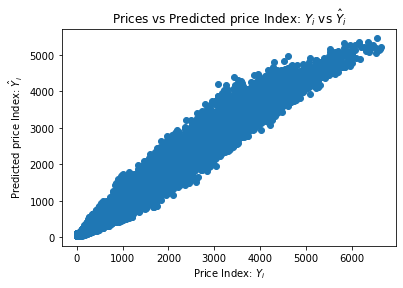

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


y_pred = model.predict(X_test_t, batch_size=32)
plt.scatter(y_test, y_pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

In [ ]:
df

,시간,구분,공급량,경기도,충청도,전라도,강원도,경상도,제주도,year,month,day,weekday
0,1,1,2497.129,-8.64,-10.118182,-4.222727,-10.021429,-5.716129,3.60,2013,1,1,1
1,2,1,2363.265,-8.85,-9.945455,-4.686364,-10.342857,-6.400000,3.60,2013,1,1,1
2,3,1,2258.505,-8.69,-10.054545,-4.800000,-10.564286,-6.845161,3.60,2013,1,1,1
3,4,1,2243.969,-8.37,-9.990909,-4.613636,-10.950000,-7.200000,4.00,2013,1,1,1
4,5,1,2344.105,-8.52,-9.945455,-4.340909,-11.514286,-7.770968,4.75,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
254203,20,1,2233.357,0.40,2.845455,2.600000,1.971429,4.387097,8.15,2017,12,31,6
254204,21,1,2134.898,0.06,1.872727,2.040909,1.421429,3.680645,7.75,2017,12,31,6
254205,22,1,2054.192,-0.46,0.972727,1.513636,0.585714,2.854839,7.15,2017,12,31,6
254206,23,1,1981.397,-0.66,0.072727,1.018182,-0.128571,2.235484,6.85,2017,12,31,6


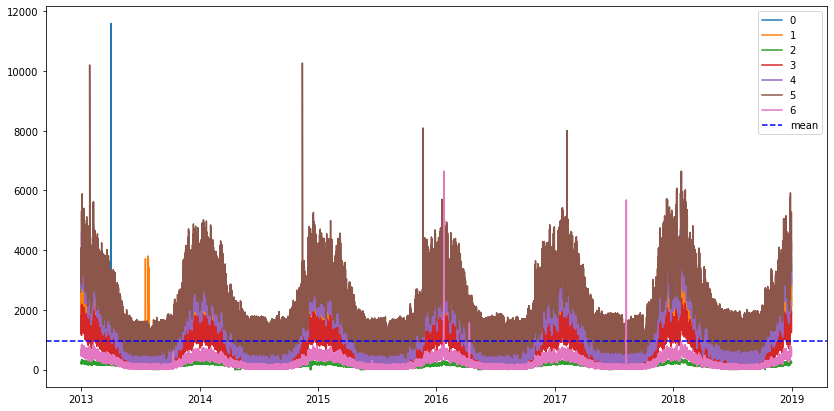

In [ ]:
plt.figure(figsize=(14,7))
for i in data["구분"].unique():
    df = data[data["구분"]==i]
    plt.plot(df["연월일"], df["공급량"], label=str(i))

plt.axhline(y=data["공급량"].mean(), linestyle='--', color='blue', label="mean")
plt.legend()
plt.show()

In [ ]:
data

,연월일,시간,구분,공급량,경기도,충청도,전라도,강원도,경상도,제주도,월일,year,month,day,weekday
0,2013-01-01,1,0,2497.129,-8.64,-10.118182,-4.222727,-10.021429,-5.716129,3.60,01-01,2013,1,1,1
1,2013-01-01,2,0,2363.265,-8.85,-9.945455,-4.686364,-10.342857,-6.400000,3.60,01-01,2013,1,1,1
2,2013-01-01,3,0,2258.505,-8.69,-10.054545,-4.800000,-10.564286,-6.845161,3.60,01-01,2013,1,1,1
3,2013-01-01,4,0,2243.969,-8.37,-9.990909,-4.613636,-10.950000,-7.200000,4.00,01-01,2013,1,1,1
4,2013-01-01,5,0,2344.105,-8.52,-9.945455,-4.340909,-11.514286,-7.770968,4.75,01-01,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,6,681.033,-3.91,-3.427273,-1.468182,-2.307143,0.532258,5.60,12-31,2018,12,31,0
368084,2018-12-31,21,6,669.961,-4.31,-3.963636,-1.854545,-3.257143,-0.038710,5.50,12-31,2018,12,31,0
368085,2018-12-31,22,6,657.941,-4.69,-4.800000,-2.386364,-3.792857,-0.316129,5.40,12-31,2018,12,31,0
368086,2018-12-31,23,6,610.953,-4.75,-5.227273,-2.586364,-4.364286,-0.745161,5.50,12-31,2018,12,31,0


,공급량,연월일
0,2497.129,2013-01-01
1,2363.265,2013-01-01
2,2258.505,2013-01-01
3,2243.969,2013-01-01
4,2344.105,2013-01-01
...,...,...
315523,3040.868,2018-12-31
315524,2973.577,2018-12-31
315525,2840.272,2018-12-31
315526,2692.385,2018-12-31


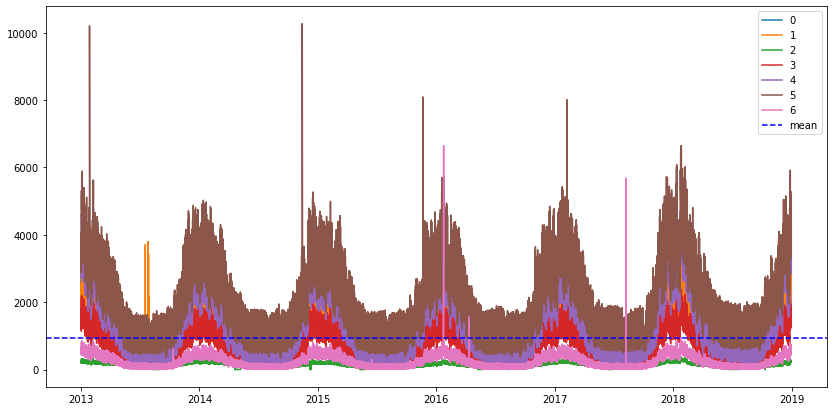

,연월일,시간,구분,공급량,경기도,충청도,전라도,강원도,경상도,제주도,월일,year,month,day,weekday
44447,2013-01-27,24,5,10207.077,-6.79,-7.300000,-3.545455,-9.314286,-4.038710,3.30,01-27,2013,1,27,6
112751,2014-11-14,24,5,10271.437,2.77,2.627273,4.090909,2.321429,5.470968,11.25,11-14,2014,11,14,4


In [ ]:
submission['공급량'] = pd.DataFrame(prediction)
submission.to_csv('/content/drive/Shareddrives/Kaggle_정예멤버/가스예측/예측값들/LSTM_submission_1.csv', index=False)  # 0.1304